In [1]:
import networkx as nx
from scipy.stats import ortho_group 
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
from scipy.stats import beta
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

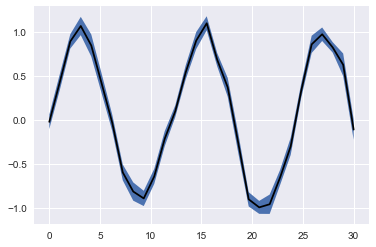

In [2]:
from matplotlib import pyplot as pl
import numpy as np

x = np.linspace(0, 30, 30)
y = np.sin(x/6*np.pi)
error = np.random.normal(0.1, 0.02, size=y.shape)
y += np.random.normal(0, 0.1, size=y.shape)

pl.plot(x, y, 'k-')
pl.fill_between(x, y-error, y+error)
pl.show()

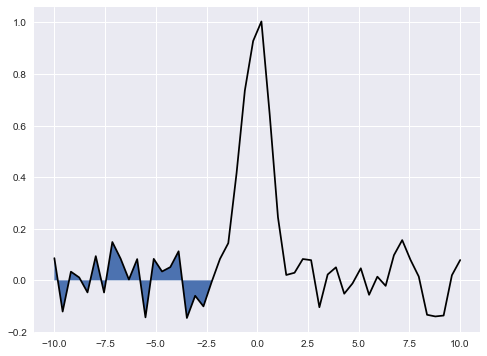

In [11]:
from matplotlib import pyplot as pl
import numpy as np
plt.figure(figsize=(8,6))
x = np.linspace(-10, 10, 50)
y = np.exp(-x**2)
error = np.random.normal(0.1, 0.02, size=y.shape)
y += np.random.normal(0, 0.1, size=y.shape)

pl.plot(x, y, 'k-')
pl.fill_between(x[0:20], 0, y[0:20])
pl.show()

## Uniform on $[0,1]$ to normal $\mathcal{N}(0,1)$

(array([ 102.,   93.,  104.,  104.,   98.,   82.,  101.,  112.,   89.,  115.]),
 array([  2.48516952e-04,   1.00070323e-01,   1.99892129e-01,
          2.99713935e-01,   3.99535741e-01,   4.99357547e-01,
          5.99179353e-01,   6.99001159e-01,   7.98822965e-01,
          8.98644771e-01,   9.98466577e-01]),
 <a list of 10 Patch objects>)

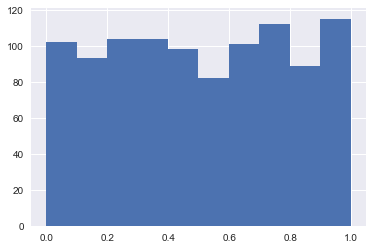

In [29]:
s = np.random.uniform(0,1,1000)
plt.hist(s)

We seek $$T \# \mu = \nu$$

In the 1d case we can use $$ T(x) = F_{\nu}^{-1} \circ F_{\mu},$$ where $$F_{\nu}(y) = \int_{-\infty}^y d\nu(y)$$ and $$F_{\mu}(x) = \int_{-\infty}^x d\mu(x)$$

### How is the inverse $F_{\nu}^{-1}$ defined when $y \mapsto F_{\nu}(y)$ isn't bijective?

We define the generalized inverse:
    
$$F_{\nu}^{-1}(y) = \textrm{min} \{ x \;\lvert\; F(x) \geq y \}$$

In [30]:
muhat = np.random.uniform(0,1,1000)

In [31]:
nuhat = norm.ppf(muhat)

(array([   8.,   30.,   94.,  205.,  260.,  210.,  136.,   44.,   11.,    2.]),
 array([-3.0819832 , -2.41877854, -1.75557387, -1.0923692 , -0.42916453,
         0.23404013,  0.8972448 ,  1.56044947,  2.22365413,  2.8868588 ,
         3.55006347]),
 <a list of 10 Patch objects>)

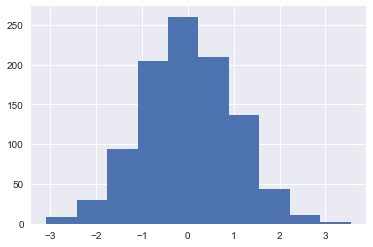

In [33]:
plt.hist(nuhat)

## Normal $\mathcal{N}(\mu,\sigma)$ to $\mathcal{N}(0,1)$. 

In this case we may already know what the answer should be, but let's confirm. For $T(x) = F_{\nu}^{-1} \circ F_{\mu}(x)$
this would mean that

$$ \int_{-\infty}^{T(x)} e^{-y^2} dy = \frac{1}{\sigma}\int_{-\infty}^x e^{-(x-\mu)^2/\sigma^2} dx.$$

Now let's let $ y = \frac{ x - \mu}{\sigma}$ to equate the integrals. Doing so we obtain

$$ \int_{-\infty}^{\sigma T(x) + \mu} e^{-(x-\mu)^2/\sigma^2} dx = \int_0^{x} e^{-(x-\mu)^2/\sigma^2} dx$$

This tells us that $\sigma T(x) + \mu = x$ or that

$$ T(x) = \frac{x - \mu}{\sigma},$$
as expected. 

## Uniform on $[0,1]$ to $\textrm{Ber}(p)$ 

  $$F_{\nu}(k)=\begin{cases}
    1-p & \text{if $0 \leq k < 1$}\\
    1 & \text{otherwise}.
  \end{cases}$$

Our generalized inverse is

$$F_{\nu}^{-1}(x) := \min \{ k \;\lvert\; F_{\nu}(k) \geq x\}$$

Thus we have
  $$F_{\nu}^{-1}(x)=\begin{cases}
    0 & \text{if $0 \leq x < 1-p$}\\
    1 & \text{otherwise}.
  \end{cases}$$

### Proof:

$$P(\Phi^{-1}(p) \leq x) = P(p \leq \Phi(x)) = \Phi(x) $$

# Higher Dimensional Data

Here we still seek $T \# \mu = \nu$ but we don't have the nice unique solution we had before. 

# Monte Carlo

In [36]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

sns.set_style('white')
sns.set_context('talk')

np.random.seed(123)

In [49]:
data = np.random.randn(100)

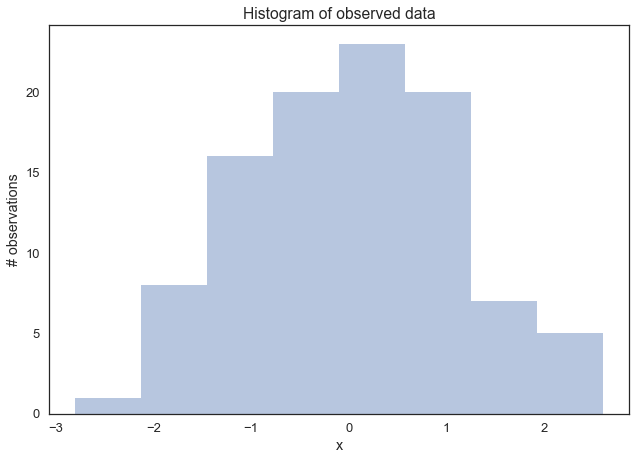

In [50]:
ax = plt.subplot()
sns.distplot(data, kde=False, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations');

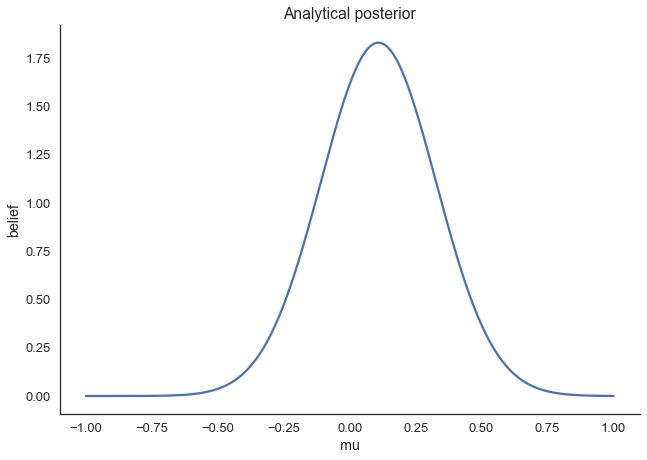

In [39]:
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

ax = plt.subplot()
x = np.linspace(-1, 1, 500)
posterior_analytical = calc_posterior_analytical(data, x, 0., 1.)
ax.plot(x, posterior_analytical)
ax.set(xlabel='mu', ylabel='belief', title='Analytical posterior');
sns.despine()

In [40]:
mu_current = 1.

In [44]:
mu_proposal = norm(mu_current, 0.2).rvs()

In [45]:
likelihood_current = norm(mu_current, 1).pdf(data).prod()
likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()

# Compute prior probability of current and proposed mu        
prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)

# Nominator of Bayes formula
p_current = likelihood_current * prior_current
p_proposal = likelihood_proposal * prior_proposal

NameError: name 'mu_prior_mu' is not defined

In [55]:
def sampler(data, samples=4, mu_init=.5, proposal_width=.5, plot=False, mu_prior_mu=0, mu_prior_sd=1.):
    mu_current = mu_init
    posterior = [mu_current]
    for i in range(samples):
        # suggest new position
        mu_proposal = norm(mu_current, proposal_width).rvs()

        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        
        # Compute prior probability of current and proposed mu        
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal?
        p_accept = p_proposal / p_current
        
        # Usually would include prior probability, which we neglect here for simplicity
        accept = np.random.rand() < p_accept
        
        if plot:
            plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accept, posterior, i)
        
        if accept:
            # Update position
            mu_current = mu_proposal
        
        posterior.append(mu_current)
        
    return posterior

# Function to display
def plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accepted, trace, i):
    from copy import copy
    trace = copy(trace)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))
    fig.suptitle('Iteration %i' % (i + 1))
    x = np.linspace(-3, 3, 5000)
    color = 'g' if accepted else 'r'
        
    # Plot prior
    prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
    prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
    prior = norm(mu_prior_mu, mu_prior_sd).pdf(x)
    ax1.plot(x, prior)
    ax1.plot([mu_current] * 2, [0, prior_current], marker='o', color='b')
    ax1.plot([mu_proposal] * 2, [0, prior_proposal], marker='o', color=color)
    ax1.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Probability Density', title='current: prior(mu=%.2f) = %.2f\nproposal: prior(mu=%.2f) = %.2f' % (mu_current, prior_current, mu_proposal, prior_proposal))
    
    # Likelihood
    likelihood_current = norm(mu_current, 1).pdf(data).prod()
    likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
    y = norm(loc=mu_proposal, scale=1).pdf(x)
    sns.distplot(data, kde=False, norm_hist=True, ax=ax2)
    ax2.plot(x, y, color=color)
    ax2.axvline(mu_current, color='b', linestyle='--', label='mu_current')
    ax2.axvline(mu_proposal, color=color, linestyle='--', label='mu_proposal')
    #ax2.title('Proposal {}'.format('accepted' if accepted else 'rejected'))
    ax2.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax2.set(title='likelihood(mu=%.2f) = %.2f\nlikelihood(mu=%.2f) = %.2f' % (mu_current, 1e14*likelihood_current, mu_proposal, 1e14*likelihood_proposal))
    
    # Posterior
    posterior_analytical = calc_posterior_analytical(data, x, mu_prior_mu, mu_prior_sd)
    ax3.plot(x, posterior_analytical)
    posterior_current = calc_posterior_analytical(data, mu_current, mu_prior_mu, mu_prior_sd)
    posterior_proposal = calc_posterior_analytical(data, mu_proposal, mu_prior_mu, mu_prior_sd)
    ax3.plot([mu_current] * 2, [0, posterior_current], marker='o', color='b')
    ax3.plot([mu_proposal] * 2, [0, posterior_proposal], marker='o', color=color)
    ax3.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    #x3.set(title=r'prior x likelihood $\propto$ posterior')
    ax3.set(title='posterior(mu=%.2f) = %.5f\nposterior(mu=%.2f) = %.5f' % (mu_current, posterior_current, mu_proposal, posterior_proposal))
    
    if accepted:
        trace.append(mu_proposal)
    else:
        trace.append(mu_current)
    ax4.plot(trace)
    ax4.set(xlabel='iteration', ylabel='mu', title='trace')
    plt.tight_layout()
    plt.legend()

/Users/dgoldma1/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


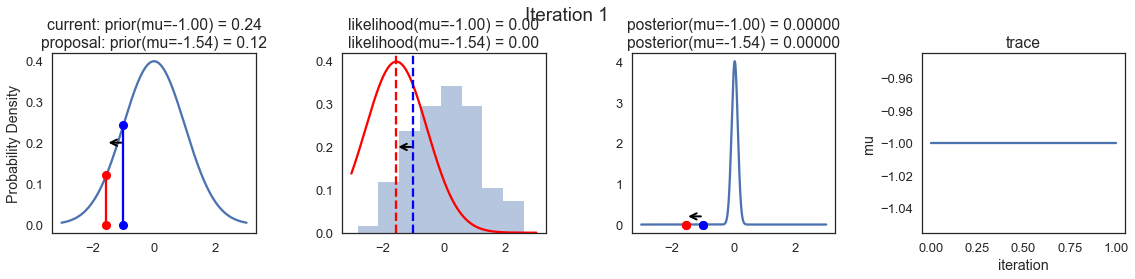

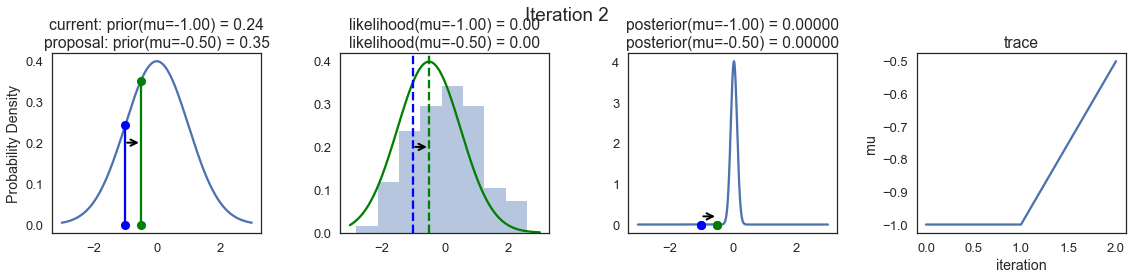

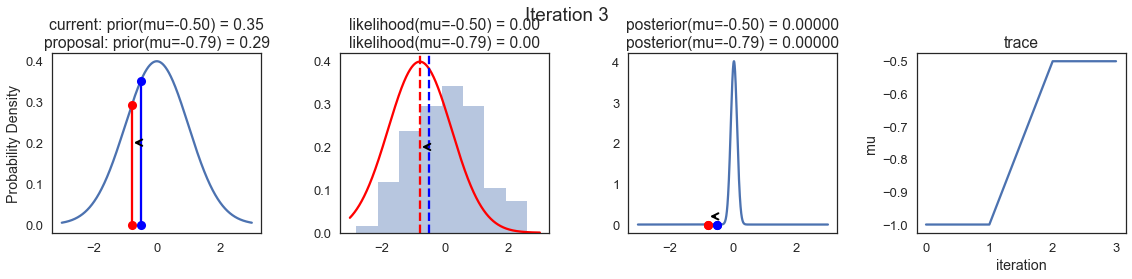

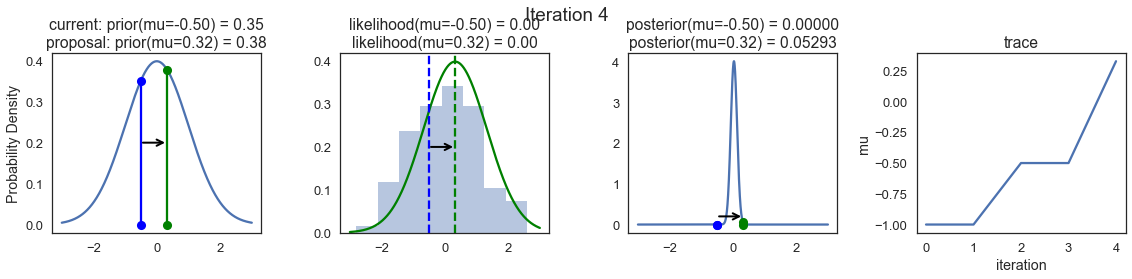

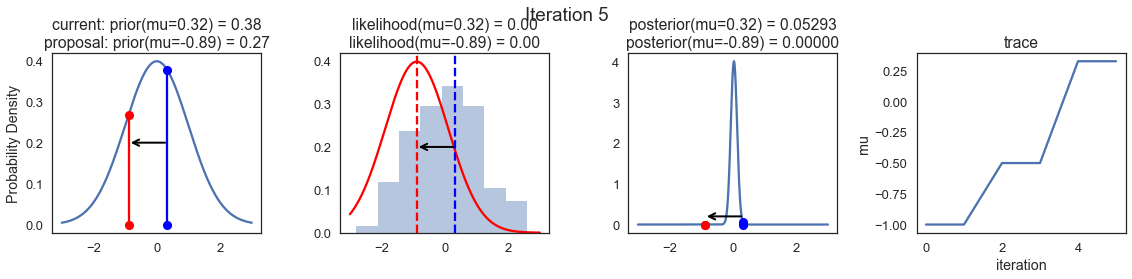

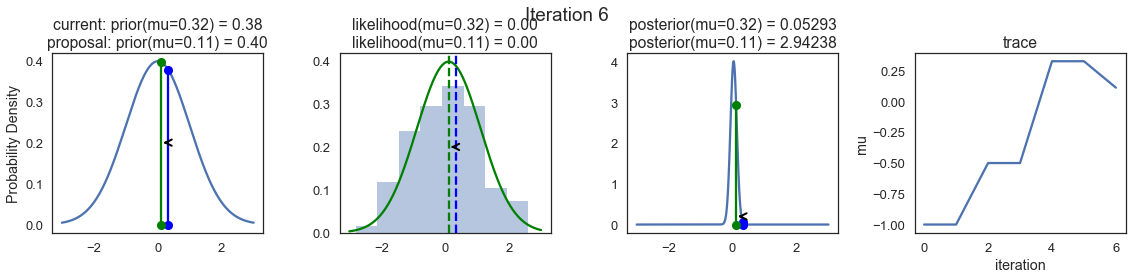

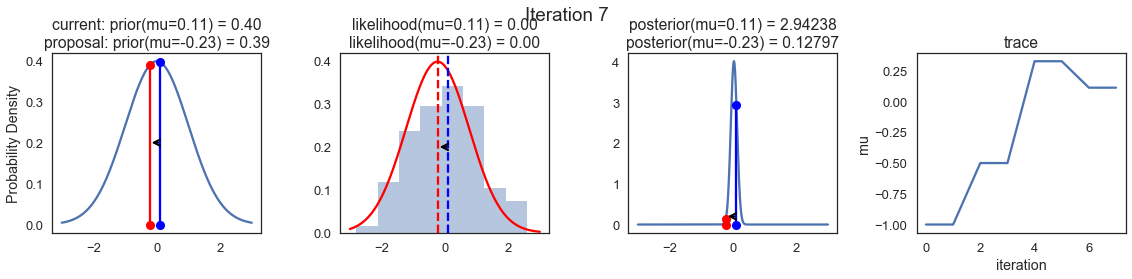

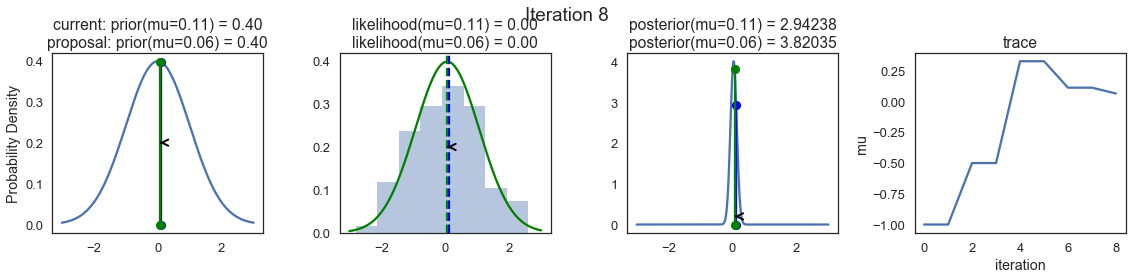

In [56]:
np.random.seed(123)
sampler(data, samples=8, mu_init=-1., plot=True);

In [75]:
1-(35/36)**24

0.4914038761309034

In [76]:
1 - (35/36)**25

0.5055315462383783

# Area of circle

In [70]:
def h(x,y):
    if x**2 + y**2 <= 1:
        return 1
    else:
        return 0
x=np.random.uniform(-1,1,100000)
y=np.random.uniform(-1,1,100000)
H = [h(x[i],y[i]) for i in range(len(x))]

In [71]:
4*np.sum(H)/len(H)

3.1413199999999999